# Step 1 : Plot Circle and Basic Vectors

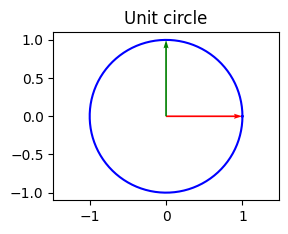

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2 * np.pi, 100)
X = np.array([np.cos(t), np.sin(t)])
plt.subplot(2, 2, 1)
plt.plot(X[0, :], X[1, :], 'b')
plt.quiver(0, 0, 1, 0, color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, 0, 1, color='g', angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Unit circle')
plt.show()

# Step 2 : SVD of Matrix A

In [3]:
A = np.array([[2, 1], [-1, 1]])
U, S, V = np.linalg.svd(A)
print("U:\n", U)
print("S:\n", S)
print("V:\n", V)

# Verify orthogonality
print("U' * U:\n", np.dot(U.T, U))
print("V' * V:\n", np.dot(V.T, V))

U:
 [[-0.95709203  0.28978415]
 [ 0.28978415  0.95709203]]
S:
 [2.30277564 1.30277564]
V:
 [[-0.95709203 -0.28978415]
 [-0.28978415  0.95709203]]
U' * U:
 [[1.00000000e+00 1.77671996e-17]
 [1.77671996e-17 1.00000000e+00]]
V' * V:
 [[ 1.00000000e+00 -2.42191841e-17]
 [-2.42191841e-17  1.00000000e+00]]


# Step 3 : Multiplication With Transpose

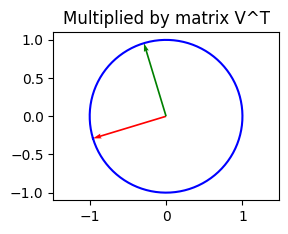

In [4]:
VX = np.dot(V.T, X)
plt.subplot(2, 2, 2)
plt.plot(VX[0, :], VX[1, :], 'b')
plt.quiver(0, 0, V[0, 0], V[0, 1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, V[1, 0], V[1, 1], color='g', angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplied by matrix V^T')
plt.show()

#Step 4 : Stretching

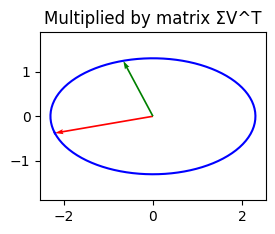

In [5]:
S_matrix = np.diag(S)
SVX = np.dot(S_matrix, VX)
plt.subplot(2, 2, 3)
plt.plot(SVX[0, :], SVX[1, :], 'b')
plt.quiver(0, 0, S[0] * V[0, 0], S[1] * V[0, 1], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, S[0] * V[1, 0], S[1] * V[1, 1], color='g', angles='xy', scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplied by matrix ΣV^T')
plt.show()

# Step 5 : Multiply With U

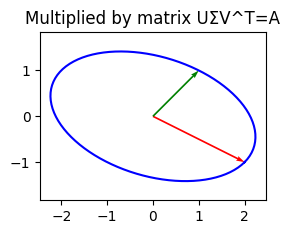

In [6]:
AX = np.dot(U, SVX)
plt.subplot(2, 2, 4)
plt.plot(AX[0, :], AX[1, :], 'b')
plt.quiver(0, 0, U[0, 0] * S[0] * V[0, 0] + U[0, 1] * S[1] * V[0, 1],
U[1, 0] * S[0] * V[0, 0] + U[1, 1] * S[1] * V[0, 1], color='r', angles='xy',
scale_units='xy', scale=1)
plt.quiver(0, 0, U[0, 0] * S[0] * V[1, 0] + U[0, 1] * S[1] * V[1, 1],
U[1, 0] * S[0] * V[1, 0] + U[1, 1] * S[1] * V[1, 1], color='g', angles='xy',
scale_units='xy', scale=1)
plt.axis('equal')
plt.title('Multiplied by matrix UΣV^T=A')
plt.show()

# Step 6 : Modify V and U

In [7]:
U1 = U
V1 = V.T
print("U1 * S * V1.T:\n", np.dot(U1, np.dot(S_matrix, V1.T)))

U1 * S * V1.T:
 [[ 2.  1.]
 [-1.  1.]]


# Step 7 : Numerical Check

In [8]:
Av1 = np.dot(A, V.T[:, 0])
Av2 = np.dot(A, V.T[:, 1])
print("Av1:\n", Av1)
print("σ1 * u1:\n", S[0] * U[:, 0])
print("Av2:\n", Av2)
print("σ2 * u2:\n", S[1] * U[:, 1])

print("A * V - U * S:\n", np.dot(A, V.T) - np.dot(U, S_matrix))

Av1:
 [-2.2039682   0.66730788]
σ1 * u1:
 [-2.2039682   0.66730788]
Av2:
 [0.37752373 1.24687618]
σ2 * u2:
 [0.37752373 1.24687618]
A * V - U * S:
 [[-8.88178420e-16  2.77555756e-16]
 [ 3.33066907e-16  2.22044605e-16]]


# Step 8 : Image Compression

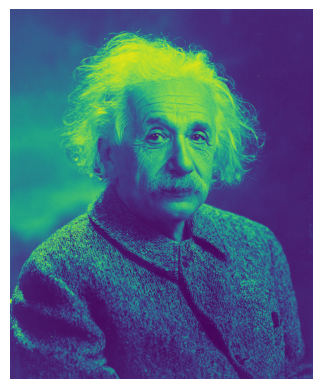

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('einstein.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# Step 9 : SVD of Image


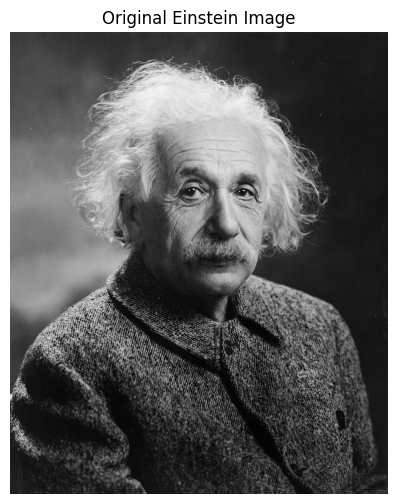

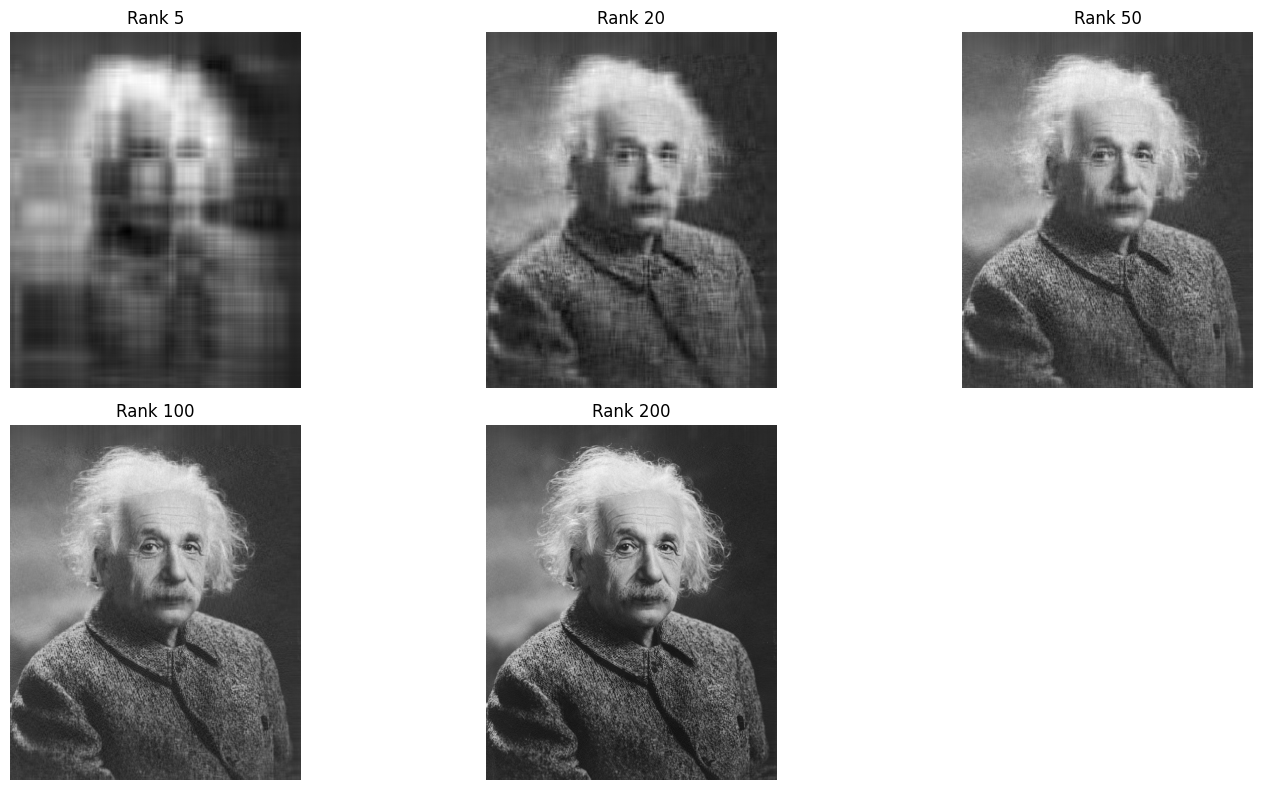

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

img = Image.open('einstein.jpg').convert('L')
img_matrix = np.array(img)

plt.figure(figsize=(6, 6))
plt.imshow(img_matrix, cmap='gray')
plt.title("Original Einstein Image")
plt.axis('off')
plt.show()

U, S, Vt = np.linalg.svd(img_matrix, full_matrices=False)

def reconstruct_image(k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))

ks = [5, 20, 50, 100, 200]

plt.figure(figsize=(15, 8))
for i, k in enumerate(ks):
    compressed = reconstruct_image(k)
    plt.subplot(2, 3, i + 1)
    plt.imshow(compressed, cmap='gray')
    plt.title(f"Rank {k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Step 10 : Singular Value Plot

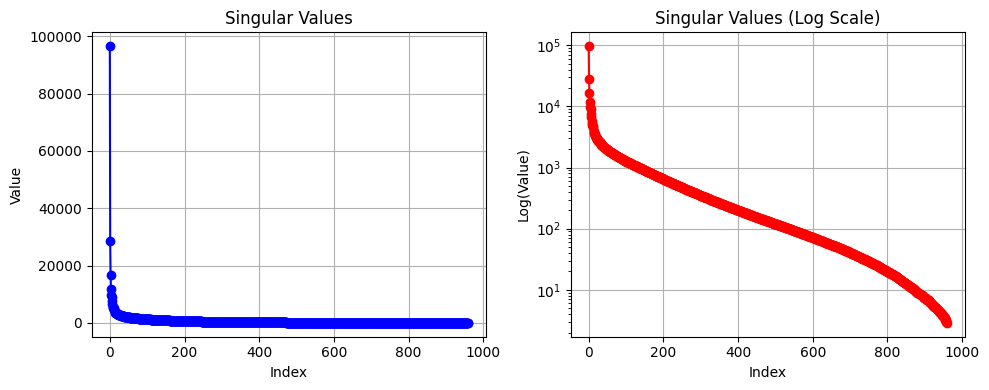

In [13]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(S, 'bo-')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(S, 'ro-')
plt.title("Singular Values (Log Scale)")
plt.xlabel("Index")
plt.ylabel("Log(Value)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 11 : Compress and Reconstruct

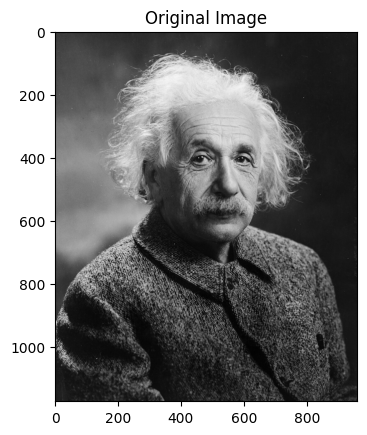

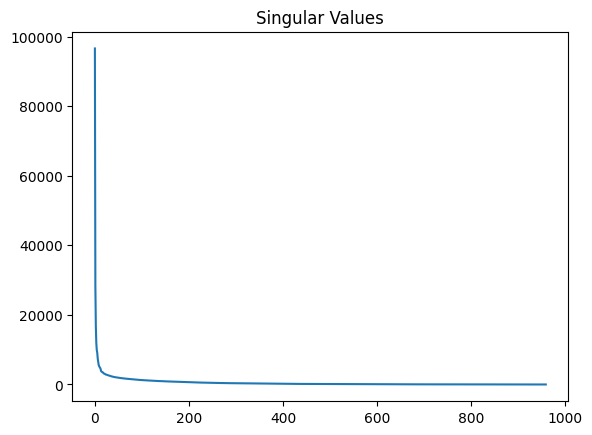

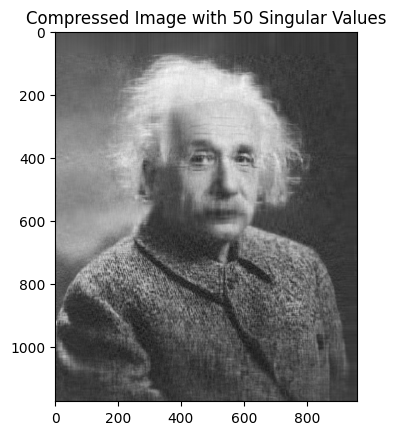

Compression percentage for 50 singular values: 0.905


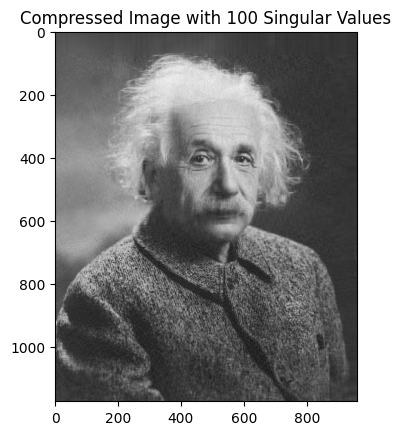

Compression percentage for 100 singular values: 0.811


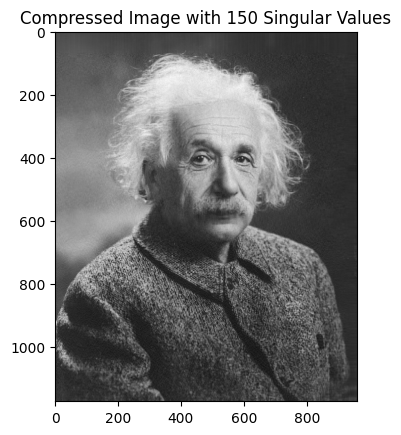

Compression percentage for 150 singular values: 0.716


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ImJPG = cv2.imread("einstein.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Image')
plt.show()

UIm, SIm, VIm = np.linalg.svd(ImJPG.astype(np.float64), full_matrices=False)

plt.figure()
plt.plot(np.arange(len(SIm)), SIm)
plt.title('Singular Values')
plt.show()

for k in [50, 100, 150]:
    ImJPG_comp = np.dot(UIm[:, :k], np.dot(np.diag(SIm[:k]), VIm[:k, :]))
    plt.figure()
    plt.imshow(ImJPG_comp, cmap='gray')
    plt.title(f'Compressed Image with {k} Singular Values')
    plt.show()
    pct = 1 - (np.size(UIm[:, :k]) + np.size(VIm[:k, :]) + np.size(SIm[:k])) / np.size(ImJPG)
    print(f'Compression percentage for {k} singular values: {pct:.3f}')

# Step 12 : Add Noise

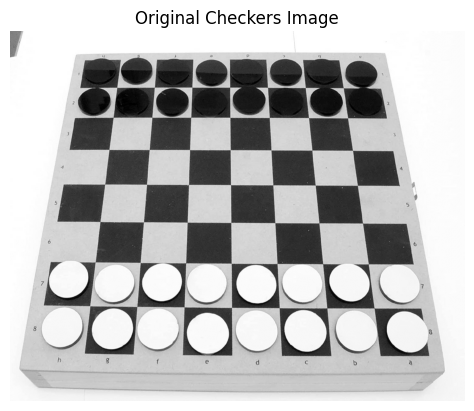

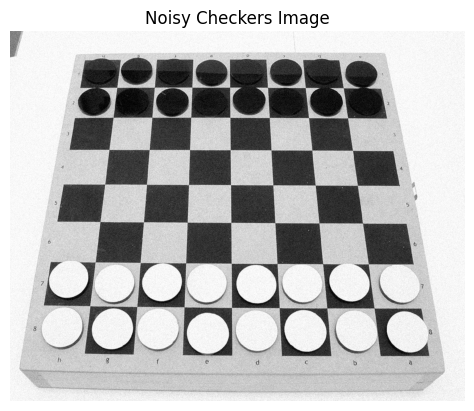

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

ImJPG = cv2.imread("checkers.jpg", cv2.IMREAD_GRAYSCALE)

m, n = ImJPG.shape
ImJPG_Noisy = ImJPG.astype(np.float64) + 50 * (np.random.rand(m, n) - 0.5)
ImJPG_Noisy = np.clip(ImJPG_Noisy, 0, 255)

plt.figure()
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Checkers Image')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(ImJPG_Noisy, cmap='gray')
plt.title('Noisy Checkers Image')
plt.axis('off')
plt.show()


# Step 13 : SVD of Checkers

In [20]:
UIm, SIm, VIm = np.linalg.svd(ImJPG_Noisy, full_matrices=False)

# Step 14 : Approximation of Image

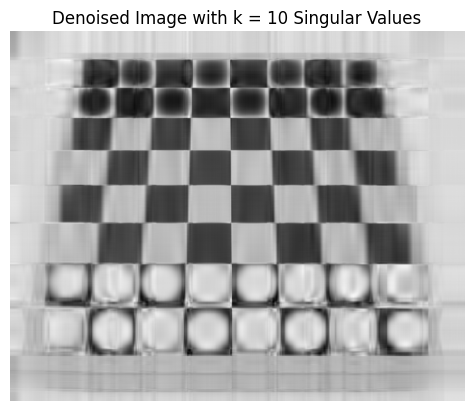

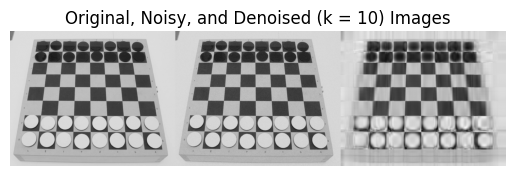

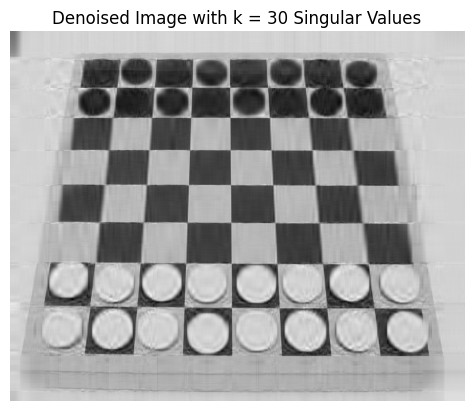

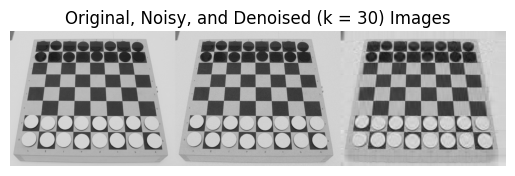

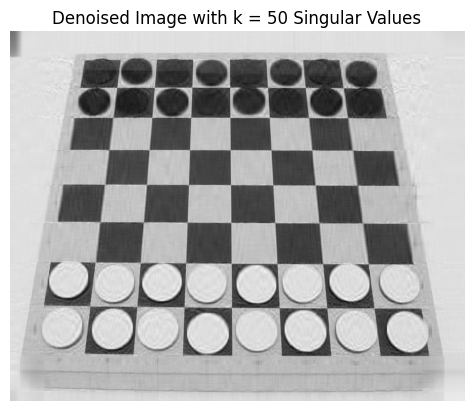

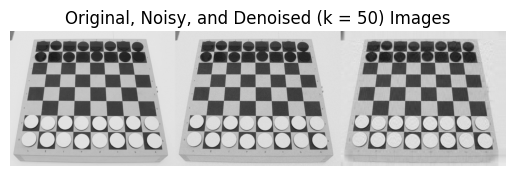

In [21]:
def approximate_image(U, S, V, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))

ks = [10, 30, 50]
for k in ks:
    ImJPG_approx = approximate_image(UIm, SIm, VIm, k)
    plt.figure()
    plt.imshow(ImJPG_approx, cmap='gray')
    plt.title(f'Denoised Image with k = {k} Singular Values')
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(np.hstack((ImJPG, ImJPG_Noisy, ImJPG_approx)), cmap='gray')
    plt.title(f'Original, Noisy, and Denoised (k = {k}) Images')
    plt.axis('off')
    plt.show()